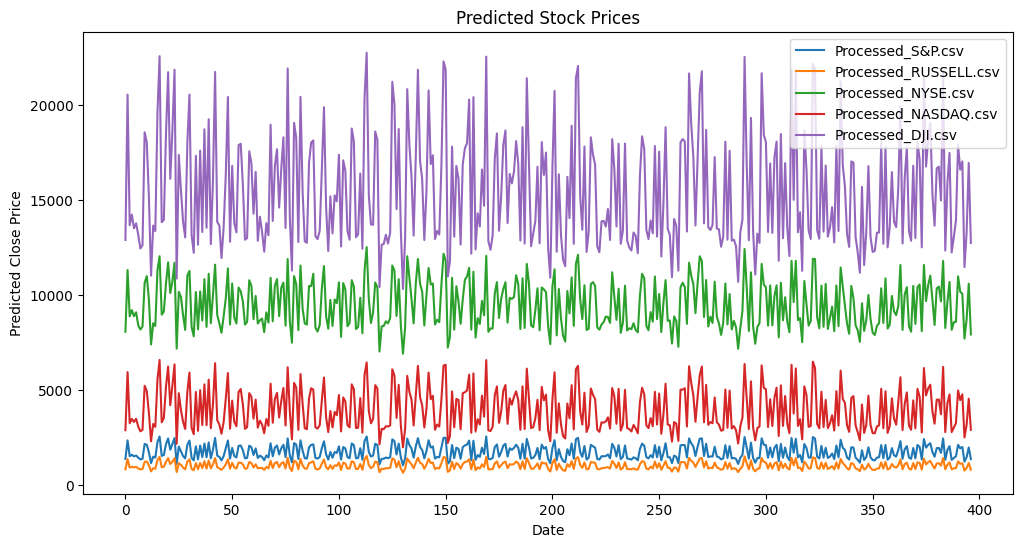

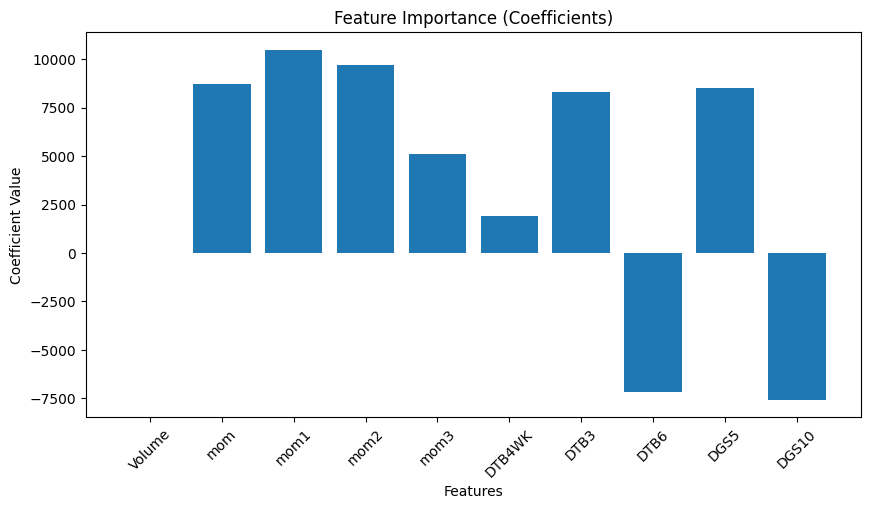

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load and preprocess data for each stock index (replace with actual file paths)
file_paths = [
    'Processed_S&P.csv',
    'Processed_RUSSELL.csv',
    'Processed_NYSE.csv',
    'Processed_NASDAQ.csv',
    'Processed_DJI.csv'
]

# Define the target variable ('Close' price) and features
target_variable = 'Close'
selected_features = [
    'Volume', 'mom', 'mom1', 'mom2', 'mom3', 'DTB4WK', 'DTB3', 'DTB6', 'DGS5', 'DGS10'
]

test_size = 0.2
random_state = 42

predictions_df = pd.DataFrame()

# Loop through each file
for file_path in file_paths:
    # Load data
    data = pd.read_csv(file_path)

    # Select features and target variable
    X = data[selected_features]
    y = data[target_variable]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create an imputer to fill missing values with the mean
    imputer = SimpleImputer(strategy='mean')

    # Fit and transform the imputer on your feature data
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)

    # Create and train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Store predictions in the predictions_df
    predictions_df[file_path] = y_pred

# Create a visualization for predicted stock prices
plt.figure(figsize=(12, 6))
for col in predictions_df.columns:
    plt.plot(predictions_df.index, predictions_df[col], label=col)

plt.xlabel('Date')
plt.ylabel('Predicted Close Price')
plt.title('Predicted Stock Prices')
plt.legend()

# Feature Importance (Coefficients) Visualization
plt.figure(figsize=(10, 5))
plt.bar(selected_features, model.coef_)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance (Coefficients)')
plt.xticks(rotation=45)
plt.show()
